<style>
    h1 {
    font-family: 'Segoe UI Semibold';
    font-size: 40px;
    color: #D3D3D3;
    text-align: center;
  }

   h2 {
    font-family: 'Segoe UI Light';
    font-size: 30px;
    color: #D3D3D3;
    text-align: center;
  }
</style>

# Analítica Computacional para la Toma de Decisiones
## Taller 1: Python y Datos

<div>
<img src= "images\image.png" width = "1200" height = "400"/>
</div>

<style>
  p {
    font-family: 'Segoe UI Light';
    font-size: 20px;
    color: #D3D3D3;
    text-align: center;
  }
</style>

Camilo Sebastian Duque Cardenas - 202024289 \
Pregrado en Ingeniería Industrial \
Universidad de los Andes &copy; 2024 \
12 de agosto de 2024


## **Cargar Librerias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Importar Datos**

In [2]:
df_bike = pd.read_csv('BikePrices.csv')
df_bike.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [3]:
df_bike.shape

(1061, 8)

In [4]:
df_bike['Brand'].unique()

array(['TVS', 'Bajaj', 'Yo', 'Honda', 'Mahindra', 'Hero', 'Yamaha',
       'Suzuki', 'Activa', 'Vespa', 'Royal', 'Benelli', 'KTM', 'UM',
       'Kawasaki', 'Hyosung', 'BMW', 'Harley', 'Jawa', 'Aprilia'],
      dtype=object)

In [5]:
df_bike["Brand"].value_counts()

Brand
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Kawasaki      4
Vespa         4
UM            3
Jawa          3
Activa        3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: count, dtype: int64

In [6]:
df_bike.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [7]:
# porcentaje de motocicletas de top 5
counts = df_bike.value_counts(df_bike['Brand'])
total = sum(counts)
for i in counts.index[:5]:
  print(f'Porcentaje de {i}: {round(counts.loc[i]/total*100, 2)} %')

Porcentaje de Bajaj: 24.51 %
Porcentaje de Hero: 21.87 %
Porcentaje de Honda: 19.23 %
Porcentaje de Royal: 10.27 %
Porcentaje de Yamaha: 9.61 %


In [8]:
# numero de duplicados
duplicates = len(df_bike[df_bike.duplicated()])
print(f'Numero de Registros Duplicados: {duplicates}')

Numero de Registros Duplicados: 6


In [9]:
# número de valores perdidos
missing_values = df_bike.isnull().sum().sum()
print(f'Numero de Registros con Valores Nulos: {missing_values}')

Numero de Registros con Valores Nulos: 435


In [10]:
# Tipos de datos en el dataset
types = df_bike.dtypes.value_counts()

print('Number of Features: %d'%(df_bike.shape[1]))
print('Number of Customers: %d'%(df_bike.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 8
Number of Customers: 1061
Data Types and Frequency in Dataset:
object     4
int64      3
float64    1
Name: count, dtype: int64


## **Pre-Procesamiento de Datos**

In [11]:
# Conversión de características
df_bike['Seller_Type'] = df_bike['Seller_Type'].map({'Individual': 1, 'Dealer': 0})

In [12]:
catcols = df_bike.select_dtypes(exclude = ['int64','float64']).columns
intcols = df_bike.select_dtypes(include = ['int64']).columns
floatcols = df_bike.select_dtypes(include = ['float64']).columns

# codificación 
df_bike = pd.get_dummies(df_bike, columns = catcols)
   
print('New Number of Features: %d'%(df_bike.shape[1]))  

New Number of Features: 308


## **Histograma: Precio de Venta Motos**

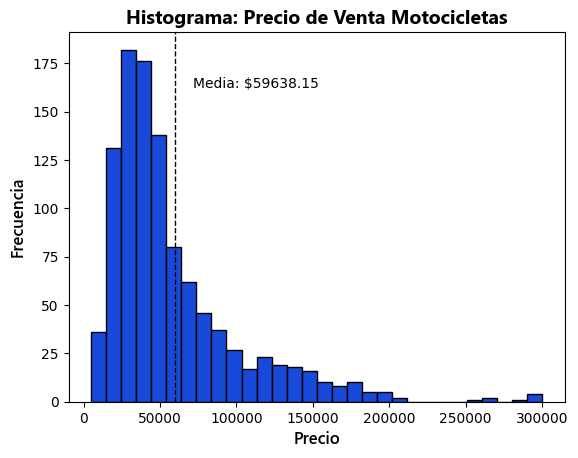

In [13]:

font1 = {'family': 'Segoe UI',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

font2 = {'family': 'Segoe UI',
        'color':  'black',
        'weight': 'semibold',
        'size': 12,
        }

plt.hist(x = df_bike['Selling_Price'], color= '#1849d9', edgecolor='k', bins=30, range=(df_bike['Selling_Price'].min(), 300000))
plt.title('Histograma: Precio de Venta Motocicletas', fontdict= font1)
plt.xlabel('Precio', fontdict= font2)
plt.ylabel('Frecuencia', fontdict= font2)
plt.axvline(df_bike['Selling_Price'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_bike['Selling_Price'].mean()*1.2, max_ylim*0.85, 'Media: ${:.2f}'.format(df_bike['Selling_Price'].mean()))

plt.savefig('images/Histograma_Precio_Moto.png')
plt.show()